# Tokyo Olympics 2021 Data Analysis  

=========================================================================================================================

### Table of contents

[1. Importing the required libraries](#Importing-the-required-libraries)

[2. Loading the datasets](#Loading-the-datasets)

[3. Functions for checking null and duplicate values](#Functions-for-checking-null-and-duplicate-values)

[4. Data cleaning and preprocessing](#Data-cleaning-and-preprocessing)

[5. Medals Analysis](#Medals-Analysis)

     - Top 10 NOCs by total number of medals
     
     - Top 10 NOCs medal distribution

[6. Athletes Analysis](#Athletes-Analysis)

     - Top 20 NOCs by total number of athletes per NOC
     
     - Maximum athletes are participating in which discipline?
     
[7. Teams Analysis](#Teams-Analysis)

     - Which NOCs had the most and least participation in terms of number of disciplines?

[8. Gender Analysis](#Gender-Analysis)

     - Athelte participation ratio (Male:Female)
     
     - Number of male and female athletes per discipline

[9. Coaches Analysis](#Coaches-Analysis)

     - Top 10 NOCs by number of coaches 

=========================================================================================================================

## Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

=========================================================================================================================

## Loading the datasets 

In [3]:
medals = pd.read_excel('datasets/Medals.xlsx')
athletes = pd.read_excel('datasets/Athletes.xlsx')
teams = pd.read_excel('datasets/Teams.xlsx')
gender_entries = pd.read_excel('datasets/EntriesGender.xlsx')
coaches = pd.read_excel('datasets/Coaches.xlsx')

**Medals:**
- Rank of NOC: overall rank
- Team/NOC: Names of the teams
- Gold: No. of gold medals won
- Silver: No. of silver medals won
- Bronze: No. of bronze medals won
- Total: Total no. of medals
- Rank by total: Rank of NOCs on the basis of total no. of medals won

**Athletes:**
- Name: of the athlete
- NOC: they are playing for
- Discipline: they are particiapting in

**Teams:**
- Name: of the team
- Discipline: that the team is participating in
- NOC: that the team belongs to
- Event: they are participating in

**Entries Gender:**
- Discipline
- Female: Total female athletes for a particular discipline
- Male: Total male athletes for a particular discipline
- Total: Total no. of athletes for a particular discipline

**Coaches:**
- Name: of the coach
- NOC: they are training
- Discipline
- Event

=========================================================================================================================

## Functions for checking null and duplicate values 

In [4]:
def check_null(df):
    print('Total null values in each column:')
    return df.isnull().sum()


def check_duplicates(df):
    print('No. of rows & columns before dropping duplicates: ' + str(df.shape))
    df.drop_duplicates()
    print('No. of rows & columns after dropping duplicates: ' + str(df.shape))

=========================================================================================================================

## Data cleaning and preprocessing

**Medals**

In [5]:
check_null(medals)

Total null values in each column:


Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [6]:
check_duplicates(medals)

No. of rows & columns before dropping duplicates: (93, 7)
No. of rows & columns after dropping duplicates: (93, 7)


**Athletes**

In [7]:
check_null(athletes)

Total null values in each column:


Name          0
NOC           0
Discipline    0
dtype: int64

In [8]:
check_duplicates(athletes)

No. of rows & columns before dropping duplicates: (11085, 3)
No. of rows & columns after dropping duplicates: (11085, 3)


**Teams**

In [9]:
check_null(teams)

Total null values in each column:


Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

In [10]:
check_duplicates(teams)

No. of rows & columns before dropping duplicates: (743, 4)
No. of rows & columns after dropping duplicates: (743, 4)


**Gender**

In [11]:
check_null(gender_entries)

Total null values in each column:


Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [12]:
check_duplicates(gender_entries)

No. of rows & columns before dropping duplicates: (46, 4)
No. of rows & columns after dropping duplicates: (46, 4)


**Coaches**

In [13]:
check_null(coaches)

Total null values in each column:


Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

Since the 'Event' column depends on the discipline and name of the coach and follows no particular pattern, it is better to drop it. 

In [14]:
coaches = coaches.drop('Event', axis=1)

In [15]:
check_duplicates(coaches)

No. of rows & columns before dropping duplicates: (394, 3)
No. of rows & columns after dropping duplicates: (394, 3)


The data is clean now and ready for analysis.

=========================================================================================================================

## Medals Analysis

In [16]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [17]:
medals.dtypes

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

### 📍 Top 10 NOCs by total no. of medals  

In [18]:
medals = medals.sort_values(by = ['Rank by Total'], ascending = True)
top_10_by_medals = medals.head(10)
top_10_by_medals = top_10_by_medals.sort_values(by = ['Rank by Total'], ascending = False)
top_10_by_medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
7,8,France,10,12,11,33,10
6,7,Netherlands,10,12,14,36,9
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7
5,6,Australia,17,7,22,46,6
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
1,2,People's Republic of China,38,32,18,88,2
0,1,United States of America,39,41,33,113,1


Visualizing it.

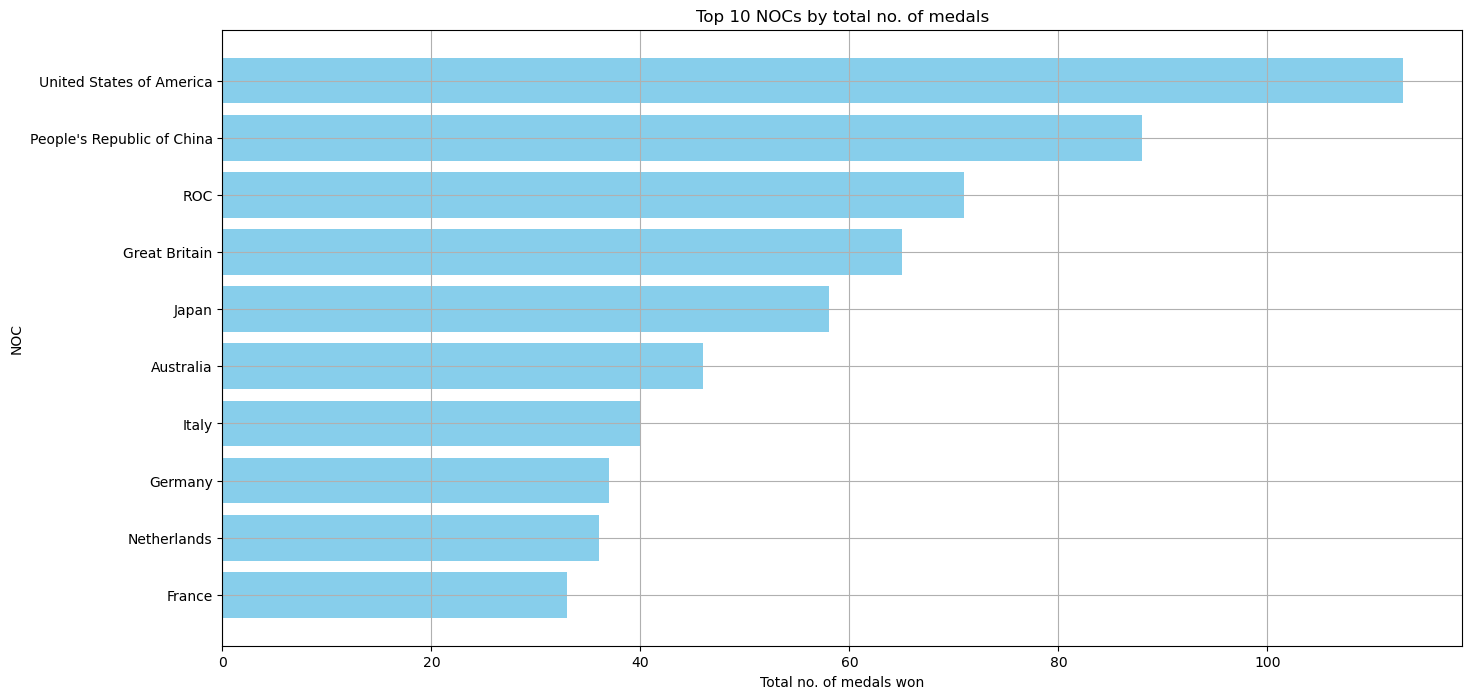

In [19]:
# plt.bar(top_10_by_medals['Rank by Total'], top_10_by_medals['Team/NOC'])
fig = plt.figure(figsize=(16, 8))
plt.barh(y = top_10_by_medals['Team/NOC'], width=top_10_by_medals['Total'], color='skyblue')
plt.title('Top 10 NOCs by total no. of medals')
plt.xlabel('Total no. of medals won')
plt.ylabel('NOC')
plt.grid()
plt.show()

### 📍 Top 10 countries medal distribution

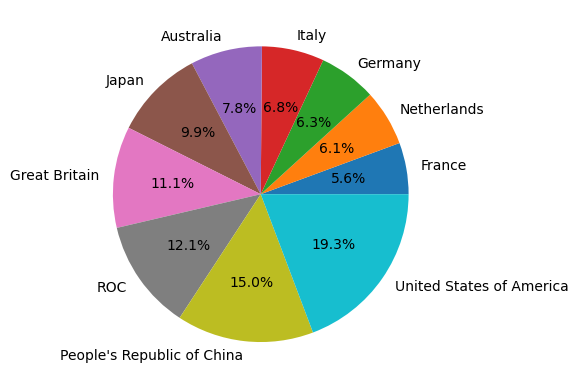

In [20]:
plt.pie(top_10_by_medals['Total'], labels = top_10_by_medals['Team/NOC'], autopct = '%1.1f%%')
plt.show()

=========================================================================================================================

## Athletes Analysis

In [21]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


### 📍 Top 20 NOCs by total no. of  athletes per NOC 

In [22]:
# counting the total no. of athletes per NOC
ath_per_noc = pd.pivot_table(athletes, values=['Name'], index=['NOC'], aggfunc={'Name':'count'})
# sorting (max to min)
ath_per_noc = ath_per_noc.sort_values(by = ['Name'], ascending = False)
ath_per_noc

,Name
NOC,
United States of America,615
Japan,586
Australia,470
People's Republic of China,401
Germany,400
...,...
South Sudan,2
Central African Republic,2
Saint Kitts and Nevis,2


Visualizing it.

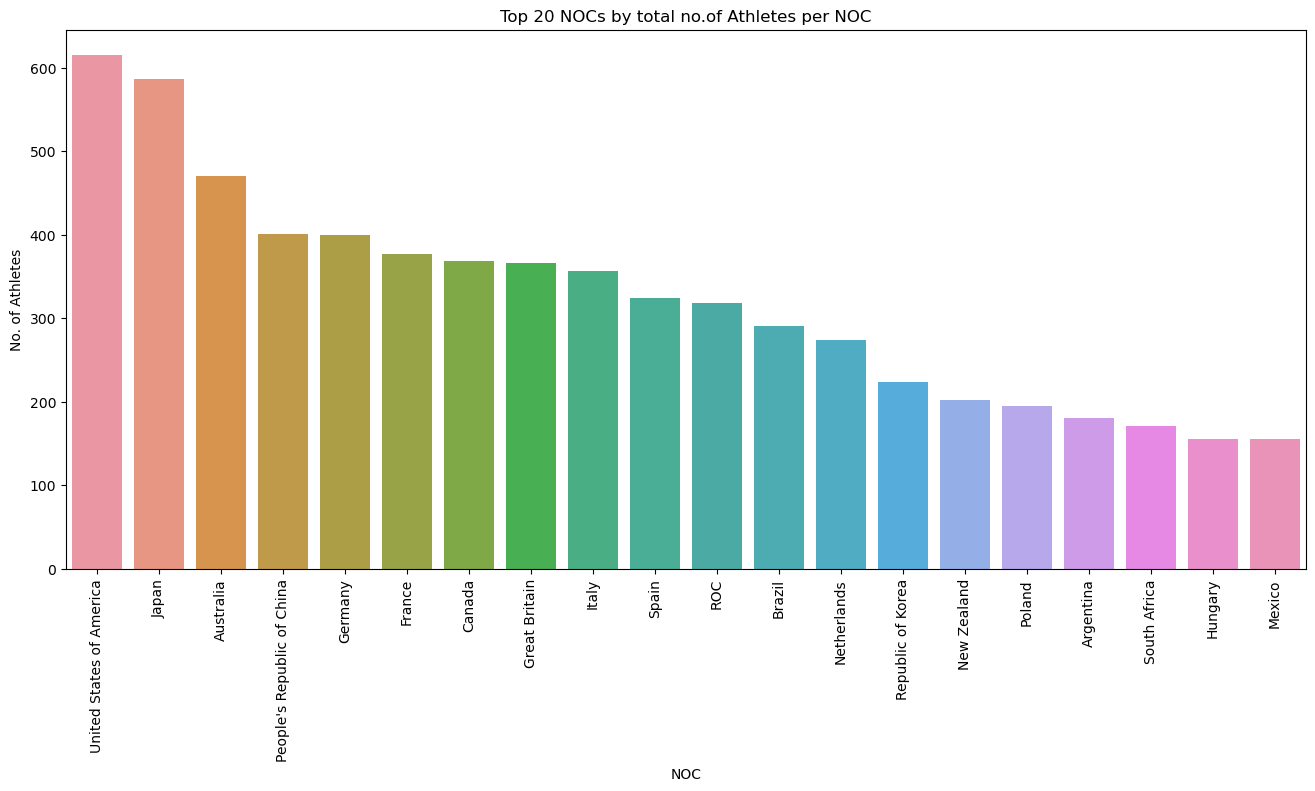

In [23]:
fig = plt.figure(figsize = (16, 7))
sns.barplot(x = ath_per_noc.head(20).index, y = 'Name', data = ath_per_noc.head(20))
plt.title('Top 20 NOCs by total no.of Athletes per NOC')
plt.xlabel('NOC')
plt.xticks(rotation='vertical')
plt.ylabel('No. of Athletes')

plt.show()

### 📍 Maximum no. of athletes are pariticipating in which discipline? 

In [24]:
athletes['Discipline'].unique()

array(['Cycling Road', 'Artistic Gymnastics', 'Rowing', 'Basketball',
       'Handball', 'Swimming', 'Karate', 'Wrestling',
       'Rhythmic Gymnastics', 'Baseball/Softball', 'Athletics',
       'Artistic Swimming', 'Judo', 'Shooting', 'Table Tennis',
       'Football', 'Taekwondo', 'Fencing', 'Badminton', 'Boxing',
       'Weightlifting', 'Archery', 'Diving', 'Beach Volleyball',
       'Sailing', 'Hockey', 'Trampoline Gymnastics', 'Marathon Swimming',
       'Triathlon', 'Canoe Slalom', 'Water Polo', 'Surfing',
       'Canoe Sprint', 'Cycling BMX Racing', 'Rugby Sevens', 'Volleyball',
       'Equestrian', 'Tennis', 'Cycling Track', 'Golf', 'Skateboarding',
       'Modern Pentathlon', 'Cycling Mountain Bike', '3x3 Basketball',
       'Cycling BMX Freestyle', 'Sport Climbing'], dtype=object)

In [25]:
ath_part = pd.pivot_table(athletes, values=['Name'], index=['Discipline'], aggfunc={'Name':'count'})
ath_part = ath_part.sort_values(by = ['Name'], ascending = False)
ath_part

,Name
Discipline,
Athletics,2068
Swimming,743
Football,567
Rowing,496
Hockey,406
Judo,373
Handball,343
Shooting,342
Sailing,336


From the above table, we can see that Athletics had maximum number of participating athletes followed by Swimming, Football and so on.

=========================================================================================================================

## Teams Analysis

In [26]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [27]:
teams['Discipline'].unique()

array(['3x3 Basketball', 'Archery', 'Artistic Gymnastics',
       'Artistic Swimming', 'Athletics', 'Baseball/Softball',
       'Basketball', 'Beach Volleyball', 'Cycling Track', 'Fencing',
       'Football', 'Handball', 'Hockey', 'Rhythmic Gymnastics',
       'Rugby Sevens', 'Swimming', 'Table Tennis', 'Triathlon',
       'Volleyball', 'Water Polo'], dtype=object)

### 📍 Which NOCs had the most and least participation in terms of no. of disciplines? 

In [28]:
teams_min_max = pd.pivot_table(teams, values = ['Discipline'], index = ['NOC'], aggfunc = {'Discipline':'count'})
teams_max = teams_min_max.sort_values(by=['Discipline'], ascending = False)
teams_max.head()

,Discipline
NOC,
Japan,48
United States of America,47
Italy,37
Germany,36
Australia,35


In [29]:
teams_min = teams_min_max.loc[teams_min_max['Discipline']==1]
teams_min

,Discipline
NOC,
Angola,1
Azerbaijan,1
Bahamas,1
Bahrain,1
Bangladesh,1
Botswana,1
Bulgaria,1
Côte d'Ivoire,1
Ecuador,1


In [30]:
teams_min.shape

(25, 1)

The NOC that participated in most number of disciplines is Japan. Also, there are 25 NOCs which participated in only one discipline as seen above.

=========================================================================================================================

## Gender Analysis 

In [31]:
gender_entries.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [32]:
gender_entries.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


### 📍 Athlete participation ratio (Male:Female) 

In [33]:
print('Total male athletes: ' + str(gender_entries['Male'].sum()))
print('Total female athletes: ' + str(gender_entries['Female'].sum()))
ath_ratio = gender_entries['Male'].sum()/gender_entries['Female'].sum()
print('(Male athletes:Female athletes) ratio = ' + str(ath_ratio))

Total male athletes: 5884
Total female athletes: 5432
(Male athletes:Female athletes) ratio = 1.0832106038291605


In [34]:
ath_rto = [gender_entries['Male'].sum(), gender_entries['Female'].sum()]

Visualizing it.

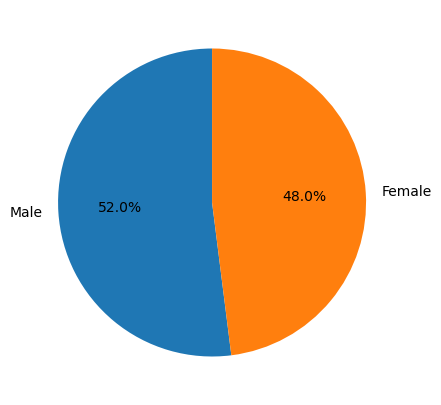

In [35]:
plt.figure(figsize=(16,5))
plt.pie(ath_rto, labels = ['Male', 'Female'], autopct = '%1.1f%%', startangle=90)
plt.show()

### 📍 No. of male and female athletes per discipline

In [36]:
gender_part = gender_entries.sort_values(by = ['Total'], ascending = False)
gender_part.head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


Visualizing it.

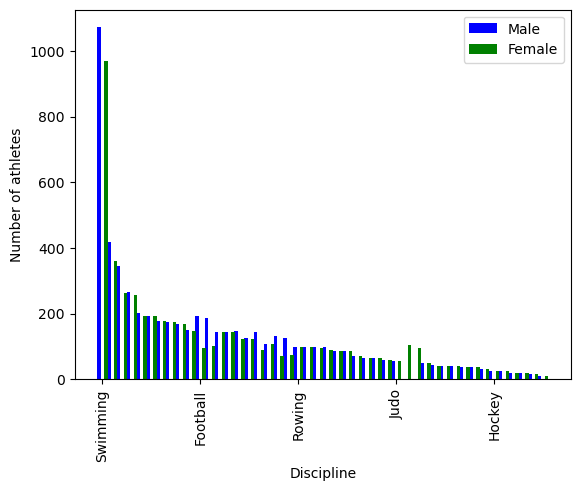

In [37]:
# plt.figure(figsize = (50, 12))

labels = gender_part['Discipline']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x-width, gender_part['Male'], color='b', width = width, label='Male')
rect2 = ax.bar(x+width, gender_part['Female'], color='g', width = width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Discipline')
ax.set_ylabel('Number of athletes')
plt.xticks(rotation = 'vertical')
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rect1, padding=3)
#ax.bar_label(rect2, padding=3)

#fig.size(20, 8)
# fig.tight_layout()

# ax.autoscale(tight=True)

plt.show()

In [38]:
# check the above chart

=========================================================================================================================

## Coaches Analysis 

In [39]:
coaches.head()

,Name,NOC,Discipline
0,ABDELMAGID Wael,Egypt,Football
1,ABE Junya,Japan,Volleyball
2,ABE Katsuhiko,Japan,Basketball
3,ADAMA Cherif,Côte d'Ivoire,Football
4,AGEBA Yuya,Japan,Volleyball


### 📍 Top 10 NOCs by no. of coaches 

In [40]:
coaches_pvt = coaches['NOC'].value_counts()
coaches_pvt = coaches_pvt.sort_values(ascending = False)
coaches_pvt

Japan                       35
Spain                       28
United States of America    28
Australia                   22
Canada                      16
                            ..
Belarus                      1
Turkey                       1
Croatia                      1
Portugal                     1
Liechtenstein                1
Name: NOC, Length: 61, dtype: int64

Visualizing it.

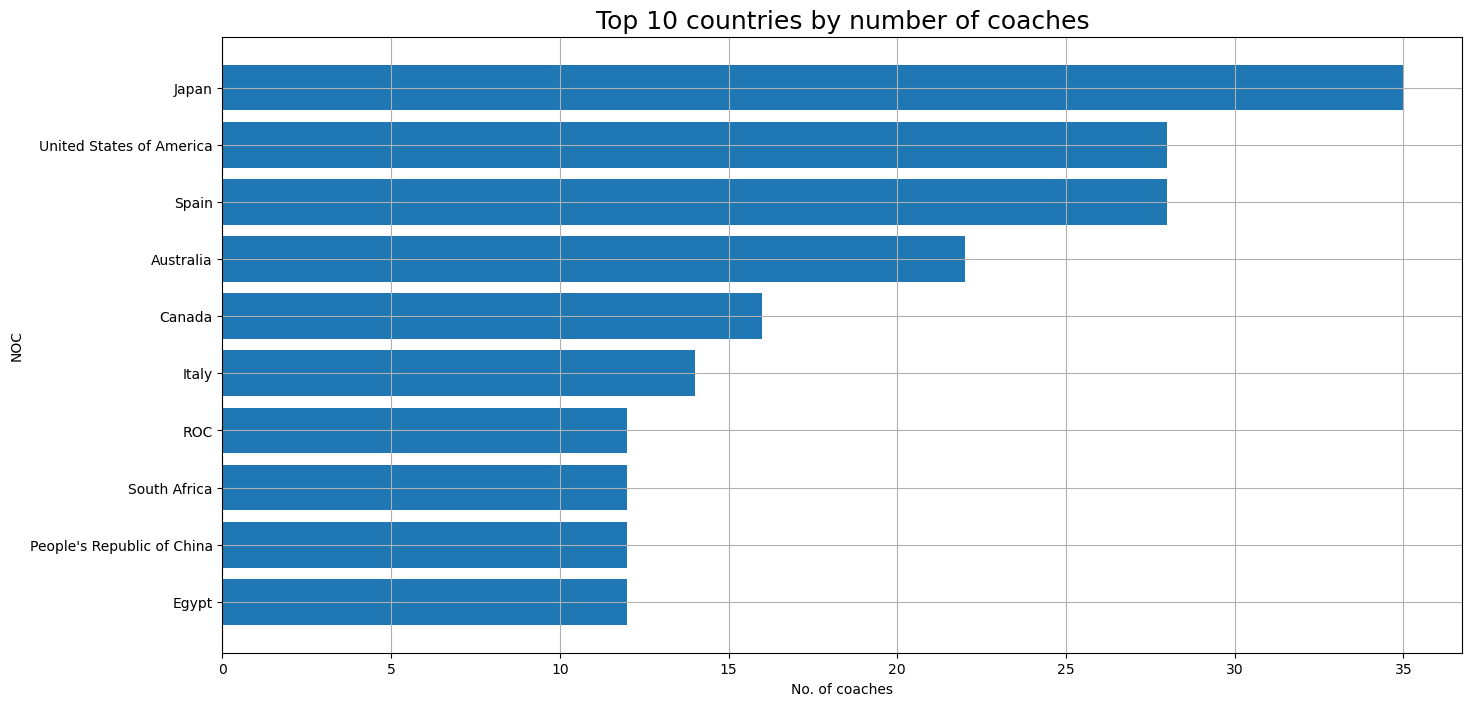

In [41]:
top_10_by_coaches = coaches_pvt.head(10)
top_10_by_coaches = top_10_by_coaches.sort_values()

fig,ax=plt.subplots(figsize=(16,8))

ax.barh(top_10_by_coaches.index, top_10_by_coaches.values)
ax.set_title("Top 10 countries by number of coaches",fontsize=18)

plt.xlabel('No. of coaches')
plt.ylabel('NOC')
plt.grid()
plt.show()

=========================================================================================================================